In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Danyella.Santana\Documents\DATA ANALYTICS\telecom_churn.csv")

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
usregions_dict = {
    'South': ['AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY'],
    'Midwest': ['IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI'],
    'Northeast': ['CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
}

In [8]:
df_region2 = pd.DataFrame([(state, region) for region, states in usregions_dict.items() for state in states], columns=['State', 'Region'])
print(df_region2)

   State     Region
0     AL      South
1     AR      South
2     DC      South
3     DE      South
4     FL      South
5     GA      South
6     KY      South
7     LA      South
8     MD      South
9     MS      South
10    NC      South
11    OK      South
12    SC      South
13    TN      South
14    TX      South
15    VA      South
16    WV      South
17    AK       West
18    AZ       West
19    CA       West
20    CO       West
21    HI       West
22    ID       West
23    MT       West
24    NM       West
25    NV       West
26    OR       West
27    UT       West
28    WA       West
29    WY       West
30    IA    Midwest
31    IL    Midwest
32    IN    Midwest
33    KS    Midwest
34    MI    Midwest
35    MN    Midwest
36    MO    Midwest
37    ND    Midwest
38    NE    Midwest
39    OH    Midwest
40    SD    Midwest
41    WI    Midwest
42    CT  Northeast
43    MA  Northeast
44    ME  Northeast
45    NH  Northeast
46    NJ  Northeast
47    NY  Northeast
48    PA  Northeast


In [9]:
df_region2 = df_region2.merge(df, left_on='State', right_on='state', how='outer')
df_region2.head()

,State,Region,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,AL,South,AL,118,510,391-8027,yes,no,0,223.4,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
1,AL,South,AL,98,408,383-1509,no,no,0,161.0,...,113,16.23,227.7,113,10.25,12.1,4,3.27,4,False
2,AL,South,AL,91,510,387-2919,yes,no,0,129.9,...,83,14.73,247.2,130,11.12,11.2,3,3.02,3,False
3,AL,South,AL,32,510,404-9680,no,no,0,230.9,...,90,15.93,154.0,53,6.93,6.3,2,1.70,0,False
4,AL,South,AL,106,415,356-1567,no,no,0,223.0,...,98,9.36,188.7,107,8.49,7.1,12,1.92,0,False


In [10]:
df_Telecom = df_region2.drop('State', axis=1)
df_Telecom.head()

,Region,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,South,AL,118,510,391-8027,yes,no,0,223.4,98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
1,South,AL,98,408,383-1509,no,no,0,161.0,117,...,113,16.23,227.7,113,10.25,12.1,4,3.27,4,False
2,South,AL,91,510,387-2919,yes,no,0,129.9,112,...,83,14.73,247.2,130,11.12,11.2,3,3.02,3,False
3,South,AL,32,510,404-9680,no,no,0,230.9,87,...,90,15.93,154.0,53,6.93,6.3,2,1.70,0,False
4,South,AL,106,415,356-1567,no,no,0,223.0,121,...,98,9.36,188.7,107,8.49,7.1,12,1.92,0,False


In [11]:
html = '''
<table class="table table-bordered responsive-utilities table-hover table-condensed mrgn-bttm-0">
<caption class="wb-inv">List of U.S. States with Codes and Abbreviations - Classification structure</caption>
<thead>
<tr>
<th scope="col" class="bg-tbl" id="un_1">Code</th>
<th scope="col" class="bg-tbl" id="un_2">State</th>
<th scope="col" class="bg-tbl" id="un_3">Abbreviation</th>
<th scope="col" class="bg-tbl" id="un_4">Alpha code</th>
</tr>
</thead>
<tbody>
<tr>
<th id="un_5" headers="un_1">01</th>
<td headers="un_5 un_2">Alabama</td>
<td headers="un_5 un_3">Ala.</td>
<td headers="un_5 un_4">AL</td>
</tr>
<tr>
<th id="un_6" headers="un_1">02</th>
<td headers="un_6 un_2">Alaska</td>
<td headers="un_6 un_3"></td>
<td headers="un_6 un_4">AK</td>
</tr>
<tr>
<th id="un_7" headers="un_1">04</th>
<td headers="un_7 un_2">Arizona</td>
<td headers="un_7 un_3">Ariz.</td>
<td headers="un_7 un_4">AZ</td>
</tr>
<tr>
<th id="un_8" headers="un_1">05</th>
<td headers="un_8 un_2">Arkansas</td>
<td headers="un_8 un_3">Ark.</td>
<td headers="un_8 un_4">AR</td>
</tr>
<tr>
<th id="un_9" headers="un_1">06</th>
<td headers="un_9 un_2">California</td>
<td headers="un_9 un_3">Calif.</td>
<td headers="un_9 un_4">CA</td>
</tr>
<tr>
<th id="un_10" headers="un_1">08</th>
<td headers="un_10 un_2">Colorado</td>
<td headers="un_10 un_3">Colo.</td>
<td headers="un_10 un_4">CO</td>
</tr>
<tr>
<th id="un_11" headers="un_1">09</th>
<td headers="un_11 un_2">Connecticut</td>
<td headers="un_11 un_3">Conn.</td>
<td headers="un_11 un_4">CT</td>
</tr>
<tr>
<th id="un_12" headers="un_1">10</th>
<td headers="un_12 un_2">Delaware</td>
<td headers="un_12 un_3">Del.</td>
<td headers="un_12 un_4">DE</td>
</tr>
<tr>
<th id="un_13" headers="un_1">11</th>
<td headers="un_13 un_2">District of Columbia</td>
<td headers="un_13 un_3">D.C.</td>
<td headers="un_13 un_4">DC</td>
</tr>
<tr>
<th id="un_14" headers="un_1">12</th>
<td headers="un_14 un_2">Florida</td>
<td headers="un_14 un_3">Fla.</td>
<td headers="un_14 un_4">FL</td>
</tr>
<tr>
<th id="un_15" headers="un_1">13</th>
<td headers="un_15 un_2">Georgia</td>
<td headers="un_15 un_3">Ga.</td>
<td headers="un_15 un_4">GA</td>
</tr>
<tr>
<th id="un_16" headers="un_1">15</th>
<td headers="un_16 un_2">Hawaii</td>
<td headers="un_16 un_3"></td>
<td headers="un_16 un_4">HI</td>
</tr>
<tr>
<th id="un_17" headers="un_1">16</th>
<td headers="un_17 un_2">Idaho</td>
<td headers="un_17 un_3"></td>
<td headers="un_17 un_4">ID</td>
</tr>
<tr>
<th id="un_18" headers="un_1">17</th>
<td headers="un_18 un_2">Illinois</td>
<td headers="un_18 un_3">Ill.</td>
<td headers="un_18 un_4">IL</td>
</tr>
<tr>
<th id="un_19" headers="un_1">18</th>
<td headers="un_19 un_2">Indiana</td>
<td headers="un_19 un_3">Ind.</td>
<td headers="un_19 un_4">IN</td>
</tr>
<tr>
<th id="un_20" headers="un_1">19</th>
<td headers="un_20 un_2">Iowa</td>
<td headers="un_20 un_3"></td>
<td headers="un_20 un_4">IA</td>
</tr>
<tr>
<th id="un_21" headers="un_1">20</th>
<td headers="un_21 un_2">Kansas</td>
<td headers="un_21 un_3">Kans.</td>
<td headers="un_21 un_4">KS</td>
</tr>
<tr>
<th id="un_22" headers="un_1">21</th>
<td headers="un_22 un_2">Kentucky</td>
<td headers="un_22 un_3">Ky.</td>
<td headers="un_22 un_4">KY</td>
</tr>
<tr>
<th id="un_23" headers="un_1">22</th>
<td headers="un_23 un_2">Louisiana</td>
<td headers="un_23 un_3"></td>
<td headers="un_23 un_4">LA</td>
</tr>
<tr>
<th id="un_24" headers="un_1">23</th>
<td headers="un_24 un_2">Maine</td>
<td headers="un_24 un_3">Me.</td>
<td headers="un_24 un_4">ME</td>
</tr>
<tr>
<th id="un_25" headers="un_1">24</th>
<td headers="un_25 un_2">Maryland</td>
<td headers="un_25 un_3">Md.</td>
<td headers="un_25 un_4">MD</td>
</tr>
<tr>
<th id="un_26" headers="un_1">25</th>
<td headers="un_26 un_2">Massachusetts</td>
<td headers="un_26 un_3">Mass.</td>
<td headers="un_26 un_4">MA</td>
</tr>
<tr>
<th id="un_27" headers="un_1">26</th>
<td headers="un_27 un_2">Michigan</td>
<td headers="un_27 un_3">Mich.</td>
<td headers="un_27 un_4">MI</td>
</tr>
<tr>
<th id="un_28" headers="un_1">27</th>
<td headers="un_28 un_2">Minnesota</td>
<td headers="un_28 un_3">Minn.</td>
<td headers="un_28 un_4">MN</td>
</tr>
<tr>
<th id="un_29" headers="un_1">28</th>
<td headers="un_29 un_2">Mississippi</td>
<td headers="un_29 un_3">Miss.</td>
<td headers="un_29 un_4">MS</td>
</tr>
<tr>
<th id="un_30" headers="un_1">29</th>
<td headers="un_30 un_2">Missouri</td>
<td headers="un_30 un_3">Mo.</td>
<td headers="un_30 un_4">MO</td>
</tr>
<tr>
<th id="un_31" headers="un_1">30</th>
<td headers="un_31 un_2">Montana</td>
<td headers="un_31 un_3">Mont.</td>
<td headers="un_31 un_4">MT</td>
</tr>
<tr>
<th id="un_32" headers="un_1">31</th>
<td headers="un_32 un_2">Nebraska</td>
<td headers="un_32 un_3">Nebr.</td>
<td headers="un_32 un_4">NE</td>
</tr>
<tr>
<th id="un_33" headers="un_1">32</th>
<td headers="un_33 un_2">Nevada</td>
<td headers="un_33 un_3">Nev.</td>
<td headers="un_33 un_4">NV</td>
</tr>
<tr>
<th id="un_34" headers="un_1">33</th>
<td headers="un_34 un_2">New Hampshire</td>
<td headers="un_34 un_3">N.H.</td>
<td headers="un_34 un_4">NH</td>
</tr>
<tr>
<th id="un_35" headers="un_1">34</th>
<td headers="un_35 un_2">New Jersey</td>
<td headers="un_35 un_3">N.J.</td>
<td headers="un_35 un_4">NJ</td>
</tr>
<tr>
<th id="un_36" headers="un_1">35</th>
<td headers="un_36 un_2">New Mexico</td>
<td headers="un_36 un_3">N.Mex.</td>
<td headers="un_36 un_4">NM</td>
</tr>
<tr>
<th id="un_37" headers="un_1">36</th>
<td headers="un_37 un_2">New York</td>
<td headers="un_37 un_3">N.Y.</td>
<td headers="un_37 un_4">NY</td>
</tr>
<tr>
<th id="un_38" headers="un_1">37</th>
<td headers="un_38 un_2">North Carolina</td>
<td headers="un_38 un_3">N.C.</td>
<td headers="un_38 un_4">NC</td>
</tr>
<tr>
<th id="un_39" headers="un_1">38</th>
<td headers="un_39 un_2">North Dakota</td>
<td headers="un_39 un_3"></td>
<td headers="un_39 un_4">ND</td>
</tr>
<tr>
<th id="un_40" headers="un_1">39</th>
<td headers="un_40 un_2">Ohio</td>
<td headers="un_40 un_3"></td>
<td headers="un_40 un_4">OH</td>
</tr>
<tr>
<th id="un_41" headers="un_1">40</th>
<td headers="un_41 un_2">Oklahoma</td>
<td headers="un_41 un_3">Okla.</td>
<td headers="un_41 un_4">OK</td>
</tr>
<tr>
<th id="un_42" headers="un_1">41</th>
<td headers="un_42 un_2">Oregon</td>
<td headers="un_42 un_3">Ore.</td>
<td headers="un_42 un_4">OR</td>
</tr>
<tr>
<th id="un_43" headers="un_1">42</th>
<td headers="un_43 un_2">Pennsylvania</td>
<td headers="un_43 un_3">Penn.</td>
<td headers="un_43 un_4">PA</td>
</tr>
<tr>
<th id="un_44" headers="un_1">44</th>
<td headers="un_44 un_2">Rhode Island</td>
<td headers="un_44 un_3">R.I.</td>
<td headers="un_44 un_4">RI</td>
</tr>
<tr>
<th id="un_45" headers="un_1">45</th>
<td headers="un_45 un_2">South Carolina</td>
<td headers="un_45 un_3">S.C.</td>
<td headers="un_45 un_4">SC</td>
</tr>
<tr>
<th id="un_46" headers="un_1">46</th>
<td headers="un_46 un_2">South Dakota</td>
<td headers="un_46 un_3"></td>
<td headers="un_46 un_4">SD</td>
</tr>
<tr>
<th id="un_47" headers="un_1">47</th>
<td headers="un_47 un_2">Tennessee</td>
<td headers="un_47 un_3">Tenn.</td>
<td headers="un_47 un_4">TN</td>
</tr>
<tr>
<th id="un_48" headers="un_1">48</th>
<td headers="un_48 un_2">Texas</td>
<td headers="un_48 un_3">Tex.</td>
<td headers="un_48 un_4">TX</td>
</tr>
<tr>
<th id="un_49" headers="un_1">49</th>
<td headers="un_49 un_2">Utah</td>
<td headers="un_49 un_3"></td>
<td headers="un_49 un_4">UT</td>
</tr>
<tr>
<th id="un_50" headers="un_1">50</th>
<td headers="un_50 un_2">Vermont</td>
<td headers="un_50 un_3">Vt.</td>
<td headers="un_50 un_4">VT</td>
</tr>
<tr>
<th id="un_51" headers="un_1">51</th>
<td headers="un_51 un_2">Virginia</td>
<td headers="un_51 un_3">Va.</td>
<td headers="un_51 un_4">VA</td>
</tr>
<tr>
<th id="un_52" headers="un_1">53</th>
<td headers="un_52 un_2">Washington</td>
<td headers="un_52 un_3">Wash.</td>
<td headers="un_52 un_4">WA</td>
</tr>
<tr>
<th id="un_53" headers="un_1">54</th>
<td headers="un_53 un_2">West Virginia</td>
<td headers="un_53 un_3">W.Va.</td>
<td headers="un_53 un_4">WV</td>
</tr>
<tr>
<th id="un_54" headers="un_1">55</th>
<td headers="un_54 un_2">Wisconsin</td>
<td headers="un_54 un_3">Wis.</td>
<td headers="un_54 un_4">WI</td>
</tr>
<tr>
<th id="un_55" headers="un_1">56</th>
<td headers="un_55 un_2">Wyoming</td>
<td headers="un_55 un_3">Wyo.</td>
<td headers="un_55 un_4">WY</td>
</tr>
</tr>

</tbody>
</table>
'''

df_statesname = pd.read_html(html)
df_statesname = df_statesname[0]

print(df_statesname)

    Code                 State Abbreviation Alpha code
0      1               Alabama         Ala.         AL
1      2                Alaska          NaN         AK
2      4               Arizona        Ariz.         AZ
3      5              Arkansas         Ark.         AR
4      6            California       Calif.         CA
5      8              Colorado        Colo.         CO
6      9           Connecticut        Conn.         CT
7     10              Delaware         Del.         DE
8     11  District of Columbia         D.C.         DC
9     12               Florida         Fla.         FL
10    13               Georgia          Ga.         GA
11    15                Hawaii          NaN         HI
12    16                 Idaho          NaN         ID
13    17              Illinois         Ill.         IL
14    18               Indiana         Ind.         IN
15    19                  Iowa          NaN         IA
16    20                Kansas        Kans.         KS
17    21  

In [12]:
telecom_df2 = pd.merge(df_statesname, df_Telecom, left_on='Alpha code', right_on='state')

telecom_df2.head()

,Code,State,Abbreviation,Alpha code,Region,state,account length,area code,phone number,international plan,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,1,Alabama,Ala.,AL,South,AL,118,510,391-8027,yes,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
1,1,Alabama,Ala.,AL,South,AL,98,408,383-1509,no,...,113,16.23,227.7,113,10.25,12.1,4,3.27,4,False
2,1,Alabama,Ala.,AL,South,AL,91,510,387-2919,yes,...,83,14.73,247.2,130,11.12,11.2,3,3.02,3,False
3,1,Alabama,Ala.,AL,South,AL,32,510,404-9680,no,...,90,15.93,154.0,53,6.93,6.3,2,1.70,0,False
4,1,Alabama,Ala.,AL,South,AL,106,415,356-1567,no,...,98,9.36,188.7,107,8.49,7.1,12,1.92,0,False


In [13]:
telecom_df3 = telecom_df2.drop(["Alpha code", "phone number", "area code"], axis=1)
telecom_df3.rename(columns={'state': 'two_letter_state'}, inplace=True)
telecom_df3.head()

,Code,State,Abbreviation,Region,two_letter_state,account length,international plan,voice mail plan,number vmail messages,total day minutes,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,1,Alabama,Ala.,South,AL,118,yes,no,0,223.4,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
1,1,Alabama,Ala.,South,AL,98,no,no,0,161.0,...,113,16.23,227.7,113,10.25,12.1,4,3.27,4,False
2,1,Alabama,Ala.,South,AL,91,yes,no,0,129.9,...,83,14.73,247.2,130,11.12,11.2,3,3.02,3,False
3,1,Alabama,Ala.,South,AL,32,no,no,0,230.9,...,90,15.93,154.0,53,6.93,6.3,2,1.70,0,False
4,1,Alabama,Ala.,South,AL,106,no,no,0,223.0,...,98,9.36,188.7,107,8.49,7.1,12,1.92,0,False


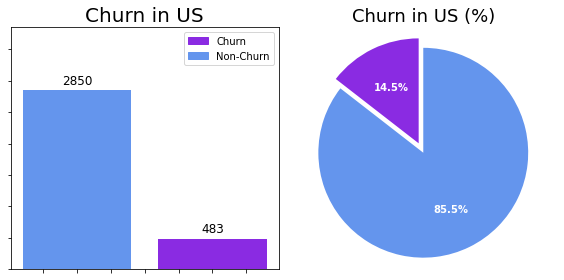

In [14]:
churn_counts = telecom_df3['churn'].value_counts()
total_churn = churn_counts[True]
total_no_churn = churn_counts[False]
churn_percent = (total_churn / len(telecom_df3)) * 100
no_churn_percent = (total_no_churn / len(telecom_df3)) * 100

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].bar(churn_counts.index, churn_counts.values, color=["cornflowerblue", "blueviolet"])

for i, count in enumerate(churn_counts.values):
    axs[0].text(i, count + 100, f"{count}", ha='center', fontsize=12)

axs[0].set_title('Churn in US', size=20)
axs[0].set_ylim([0, max(churn_counts.values) + 1000])
axs[0].grid(False)  
axs[0].set_yticklabels([]) 
axs[0].set_xticklabels([])
legend_labels = ['Churn', 'Non-Churn']
legend_colors = ['blueviolet', 'cornflowerblue']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
axs[0].legend(legend_handles, legend_labels, loc='upper right')

# Churn(%)
labels = ['Churn', 'Non-Churn']
sizes = [total_churn, total_no_churn]
percentages = [churn_percent, no_churn_percent]
colors = ['blueviolet', 'cornflowerblue']
explode = (0.1, 0)

axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'color': 'white', 'weight': 'bold'})
axs[1].set_title('Churn in US (%)', size=18)
axs[1].axis('equal')

plt.tight_layout()
plt.show()


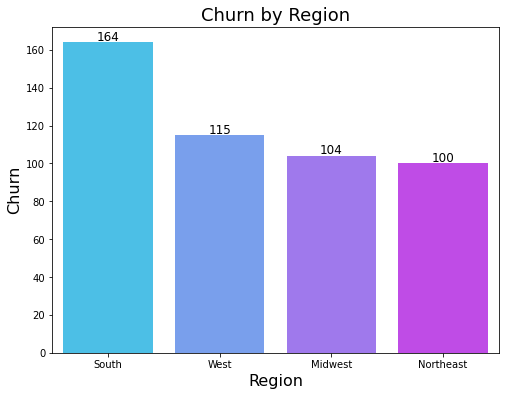

In [31]:
churn_df = telecom_df3[telecom_df3['churn'] == True]
churn_counts = churn_df['Region'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='cool')

for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 1, f"{count}", ha='center', fontsize=12)

plt.title('Churn by Region', size=18)
plt.xlabel('Region', size=16)
plt.ylabel('Churn', size=16)
plt.grid(False)

plt.show()

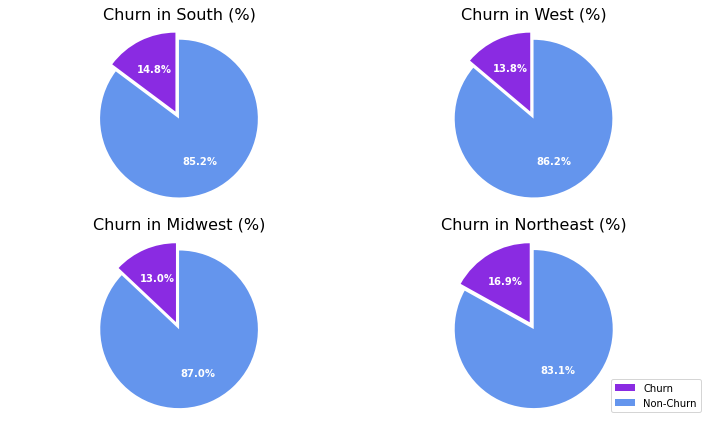

In [32]:
import matplotlib.pyplot as plt

regions = ['South', 'West', 'Midwest', 'Northeast']

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

churn_label = 'Churn'
no_churn_label = 'Non-Churn'

for i, region in enumerate(regions):
    region_df = telecom_df3[telecom_df3['Region'] == region]
    churn_counts = region_df['churn'].value_counts()
    total_churn = churn_counts[True]
    total_no_churn = churn_counts[False]
    churn_percent = (total_churn / len(region_df)) * 100
    no_churn_percent = (total_no_churn / len(region_df)) * 100

    labels = [churn_label, no_churn_label]
    sizes = [total_churn, total_no_churn]
    colors = ['blueviolet', 'cornflowerblue']
    explode = (0.1, 0)

    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
               textprops={'color': 'white', 'weight': 'bold'})
    axs[i].set_title(f'Churn in {region} (%)', size=16)
    axs[i].axis('equal')

# Add legend labels
legend_labels = [f'{churn_label}', f'{no_churn_label}']
axs[3].legend(legend_labels, loc='lower right')


plt.tight_layout()
plt.show()


In [33]:
telecom_df3['call_index'] = telecom_df3['customer service calls'].apply(lambda x: 'No calls' if x == 0 else 'One or more calls')
telecom_df3.head()

,Code,State,Abbreviation,Region,two_letter_state,account length,international plan,voice mail plan,number vmail messages,total day minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_index
0,1,Alabama,Ala.,South,AL,118,yes,no,0,223.4,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,No calls
1,1,Alabama,Ala.,South,AL,98,no,no,0,161.0,...,16.23,227.7,113,10.25,12.1,4,3.27,4,False,One or more calls
2,1,Alabama,Ala.,South,AL,91,yes,no,0,129.9,...,14.73,247.2,130,11.12,11.2,3,3.02,3,False,One or more calls
3,1,Alabama,Ala.,South,AL,32,no,no,0,230.9,...,15.93,154.0,53,6.93,6.3,2,1.70,0,False,No calls
4,1,Alabama,Ala.,South,AL,106,no,no,0,223.0,...,9.36,188.7,107,8.49,7.1,12,1.92,0,False,No calls


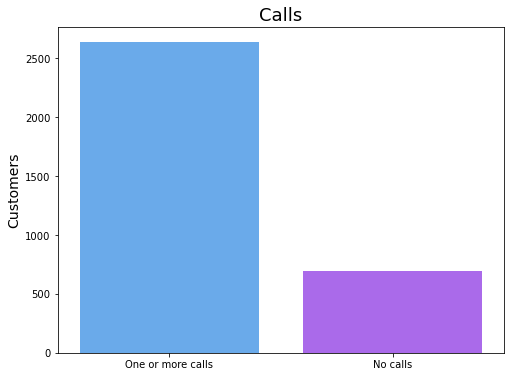

In [34]:
call_counts = telecom_df3['call_index'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=call_counts.index, y=call_counts.values, palette='cool')
plt.title('Calls', size=18)
plt.ylabel('Customers', size=14)
plt.grid(False)
plt.show()

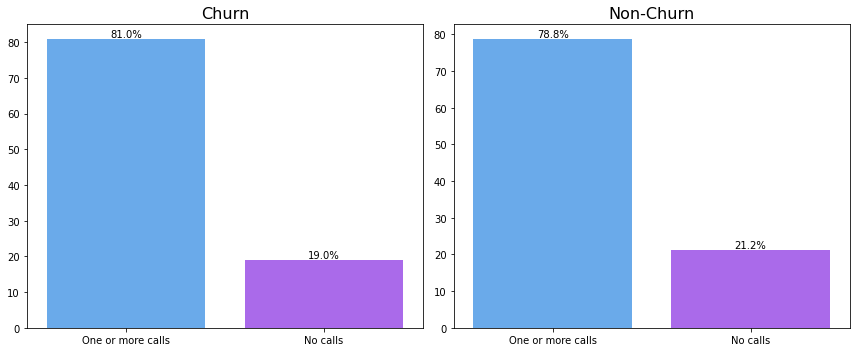

In [35]:
plt.figure(figsize=(12, 5))

churn_false_counts = telecom_df3.loc[telecom_df3['churn'] == False, 'call_index'].value_counts(normalize=True) * 100

plt.subplot(1, 2, 2)
sns.barplot(x=churn_false_counts.index, y=churn_false_counts.values, palette='cool')

for i, count in enumerate(churn_false_counts.values):
    plt.text(i, count + 0, f"{count:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Non-Churn', size=16)
plt.grid(False)


churn_true_counts = telecom_df3.loc[telecom_df3['churn'] == True, 'call_index'].value_counts(normalize=True) * 100

plt.subplot(1, 2, 1)
sns.barplot(x=churn_true_counts.index, y=churn_true_counts.values, palette='cool')


for i, count in enumerate(churn_true_counts.values):
    plt.text(i, count + 0, f"{count:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Churn', size=16)
plt.grid(False)


plt.tight_layout()
plt.show()


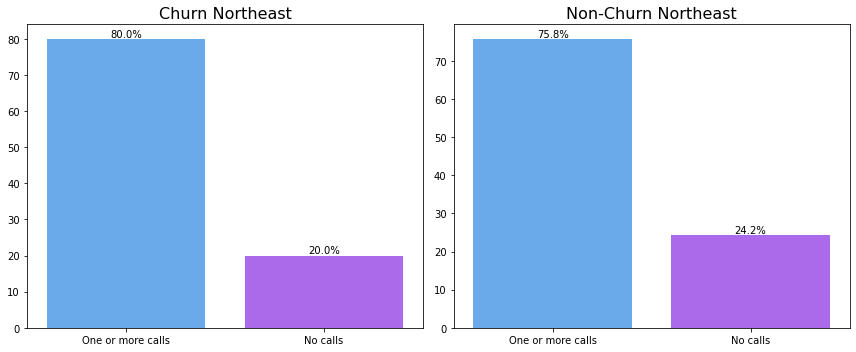

In [37]:
plt.figure(figsize=(12, 5))

churn_false_counts = telecom_df3.loc[(telecom_df3['churn'] == False) & (telecom_df3['Region'] == 'Northeast'), 'call_index'].value_counts(normalize=True) * 100

plt.subplot(1, 2, 2)
sns.barplot(x=churn_false_counts.index, y=churn_false_counts.values, palette='cool')

for i, count in enumerate(churn_false_counts.values):
    plt.text(i, count + 0, f"{count:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Non-Churn Northeast', size=16)
plt.grid(False)


churn_true_counts = telecom_df3.loc[(telecom_df3['churn'] == True) & (telecom_df3['Region'] == 'Northeast'), 'call_index'].value_counts(normalize=True) * 100

plt.subplot(1, 2, 1)
sns.barplot(x=churn_true_counts.index, y=churn_true_counts.values, palette='cool')

for i, count in enumerate(churn_true_counts.values):
    plt.text(i, count + 0, f"{count:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Churn Northeast', size=16)
plt.grid(False)

plt.tight_layout()
plt.show()


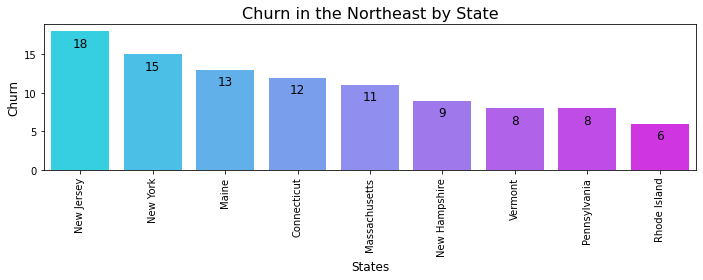

In [38]:
churned_northeast_df = telecom_df3[(telecom_df3['churn'] == True) & (telecom_df3['Region'] == 'Northeast')]
churn_counts = churned_northeast_df['State'].value_counts()
churn_counts = churn_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='cool')

for i, count in enumerate(churn_counts.values):
    plt.text(i, count -2, f"{count}", ha='center', fontsize=12)

plt.title('Churn in the Northeast by State', size=16)
plt.xlabel('States', size=12)
plt.ylabel('Churn', size=12)
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

In [39]:
def map_aging(account_length):
    if account_length <= 60:
        return '1-5'
    elif account_length <= 120:
        return '6-10'
    elif account_length <= 180:
        return '11-15'
    else:
        return '>15'

telecom_df3['aging'] = telecom_df3['account length'].apply(map_aging)
telecom_df3.head()

,Code,State,Abbreviation,Region,two_letter_state,account length,international plan,voice mail plan,number vmail messages,total day minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_index,aging
0,1,Alabama,Ala.,South,AL,118,yes,no,0,223.4,...,203.9,118,9.18,6.3,6,1.70,0,False,No calls,6-10
1,1,Alabama,Ala.,South,AL,98,no,no,0,161.0,...,227.7,113,10.25,12.1,4,3.27,4,False,One or more calls,6-10
2,1,Alabama,Ala.,South,AL,91,yes,no,0,129.9,...,247.2,130,11.12,11.2,3,3.02,3,False,One or more calls,6-10
3,1,Alabama,Ala.,South,AL,32,no,no,0,230.9,...,154.0,53,6.93,6.3,2,1.70,0,False,No calls,1-5
4,1,Alabama,Ala.,South,AL,106,no,no,0,223.0,...,188.7,107,8.49,7.1,12,1.92,0,False,No calls,6-10


Text(0.5, 1.0, 'Churn vs account length')

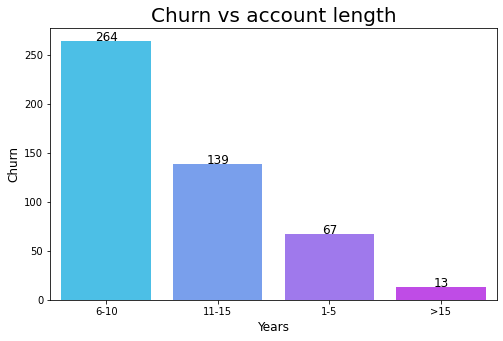

In [40]:
churn_df = telecom_df3[telecom_df3['churn'] == True]

aging_counts = churn_df['aging'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=aging_counts.index, y=aging_counts.values, palette='cool')

for i, count in enumerate(aging_counts.values):
    plt.text(i, count +0, f"{count}", ha='center', fontsize=12)
    plt.grid(False)
    plt.xlabel('Years', size=12)
    plt.ylabel('Churn', size=12)

plt.title('Churn vs account length', size=20)

